In [1]:
import os
import pandas as pd
## Import relevant libraries
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../py_files/')
import quadrop as qd

# import gaussian filter
from scipy.ndimage import gaussian_filter1d
# qd.set_plotting_style()

This notebook starts by concatenating all the merged_expression_PIV.csv files
from the different experiments. These files combine expression data with PIV
data.


In [2]:
def concatenate_merged_expression_piv(data_paths, output_save_folder=None):
    """
    Concatenate the merged_expression_PIV.csv files from multiple data paths into one file.

    Parameters:
    - data_paths: List of paths where the merged_expression_PIV.csv files are located.
    - output_folder: Folder where the merged_expression_PIV.csv files are stored.
    - merged_file_name: Name of the merged expression PIV file to read.
    - output_file_name: Name of the output concatenated file to save.
    - output_save_folder: Folder where the concatenated file will be saved. If None, save in the first data path's output folder.
    
    The concatenated file will be saved in the specified `output_save_folder`, or the first path in `data_paths` if not provided.
    """
    
    output_folder="output_data"
    merged_file_name="merged_expression_PIV.csv"
    output_file_name="merged_expression_PIV.csv"
    
    # List to store DataFrames from each path
    dataframes = []

    # Loop over each data path
    for path in data_paths:
        merged_file_path = os.path.join(path, output_folder, merged_file_name)
        
        # Check if the merged file exists
        if os.path.exists(merged_file_path):
            # Read the merged_expression_PIV.csv file
            df = pd.read_csv(merged_file_path)
            dataframes.append(df)
            print(f"Loaded data from: {merged_file_path}")
        else:
            print(f"File not found: {merged_file_path}")

    if not dataframes:
        print("No valid files found to concatenate.")
        return

    # Concatenate all DataFrames
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Determine the output directory
    if output_save_folder is None:
        output_save_folder = os.path.join(data_paths[0], output_folder)
    
    os.makedirs(output_save_folder, exist_ok=True)  # Ensure the output directory exists
    
    # Save the concatenated DataFrame to the output directory
    output_file_path = os.path.join(output_save_folder, output_folder, output_file_name)
    concatenated_df.to_csv(output_file_path, index=False)

    conditions = list(concatenated_df['condition'].unique())
    columns = list(concatenated_df.columns)

    print(f"Concatenated DataFrame saved to: {output_file_path}")

    return conditions, columns
    


D_Heal = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091724-D_HeAl-RT/2p5TMB-1ulDNA100nM_/"
Tila_Nagr = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/092224-TiLa_NaGr-RT/2p5ulTMB-1ulDNA100nM_/"
Acsu_Acsu2 = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/092224-AcSu_AcSu2-RT/2p5ulTMB-1ulDNA100nM_/"
sustained = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091024-sustainedMotors-RT/2p5TMB-1ulDNA100nM_/"
H_AdPa = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091724-H_AdPa-RT/2p5TMB-1ulDNA100nM_3/"



output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"

# Example usage of the function:
conditions, columns = concatenate_merged_expression_piv(
    data_paths=[D_Heal, Tila_Nagr, sustained, ],
    output_save_folder = output_save_folder
)


Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091724-D_HeAl-RT/2p5TMB-1ulDNA100nM_/output_data/merged_expression_PIV.csv
Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/092224-TiLa_NaGr-RT/2p5ulTMB-1ulDNA100nM_/output_data/merged_expression_PIV.csv
Loaded data from: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091024-sustainedMotors-RT/2p5TMB-1ulDNA100nM_/output_data/merged_expression_PIV.csv
Concatenated DataFrame saved to: ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/output_data/merged_expression_PIV.csv


Now let's load the dataframe and make corrections.

In [3]:
df = pd.read_csv(output_save_folder + "output_data/merged_expression_PIV.csv")
df = df[~df['condition'].isin(['NaFo-RT', 'negative', 'BleSto-RT', 'TiLa-RT', 'H-RT', 'NaGr-RT', ])]
df.columns

Index(['condition', 'subcondition', 'time (s)', 'Time_min', 'Time_h',
       'Mean Intensity', 'Protein Concentration_ng_ul',
       'Protein Concentration_nM', 'Number of Protein Molecules',
       'Rate of Change of Protein Molecules per Second',
       'Translation Rate aa_s', 'Unnamed: 0', 'frame', 'x [m]_mean',
       'y [m]_mean', 'u [m/s]_mean', 'v [m/s]_mean', 'data type [-]_mean',
       'vorticity [1/s]_mean', 'velocity magnitude [m/s]_mean',
       'divergence [1/s]_mean', 'dcev [1]_mean', 'shear [1/s]_mean',
       'strain [1/s]_mean', 'vector direction [degrees]_mean',
       'correlation length [m]_mean', 'distance [m]_mean', 'power [W]_mean',
       'work [J]_mean', 'time (min)', 'time (h)'],
      dtype='object')

In [4]:
df['condition'].unique()

array(['D-RT', 'HeAl-RT', 'AcSu2-RT', 'AcSu-RT', 'AdPa-RT', 'DiPu-RT',
       'Kif5-RT', 'ThTr-RT'], dtype=object)

In [5]:
df_H = pd.read_csv("../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091724-H_AdPa-RT/2p5TMB-1ulDNA100nM_3/output_data/merged_expression_PIV.csv")
df_H = df_H[~df_H['condition'].isin(['AdPa-RT'])]

df_TiLa = pd.read_csv("../../../../Thomson Lab Dropbox/David Larios/activedrops/main/092224-TiLa_NaGr-RT/2p5ulTMB-1ulDNA100nM_/output_data/merged_expression_PIV.csv")

df = pd.concat([df, df_H, df_TiLa], ignore_index=True)
df

,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Number of Protein Molecules,Rate of Change of Protein Molecules per Second,...,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h)
0,D-RT,Rep1,0,0.000000,0.000000,1.821224,0.066443,1.496465,1.795758e+09,NaN,...,11.790483,-4.566826e-06,3.905967e-06,14.046565,0.000339,0.000000,7.755402e-20,7.755402e-20,0.000000,0.000000
1,D-RT,Rep1,8,0.133333,0.002222,1.413806,0.051579,1.161697,1.394037e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D-RT,Rep1,16,0.266667,0.004444,1.211346,0.044193,0.995339,1.194407e+09,NaN,...,12.042903,-2.264879e-06,6.104016e-06,-67.071812,0.000341,0.000001,1.064173e-19,1.839714e-19,0.266667,0.004444
3,D-RT,Rep1,24,0.400000,0.006667,0.941511,0.034349,0.773621,9.283455e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D-RT,Rep1,32,0.533333,0.008889,0.439842,0.016047,0.361410,4.336916e+08,NaN,...,15.886629,-7.009049e-07,5.021708e-06,-91.276090,0.000343,0.000003,1.319374e-19,3.159088e-19,0.533333,0.008889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,TiLa-RT,Rep1,14360,239.333333,3.988889,14.953362,0.545538,12.426830,1.491220e+10,3.985307e+06,...,12.721802,-4.382583e-07,-1.246600e-07,35.536344,0.000063,0.000162,1.878973e-22,3.947314e-18,239.333333,3.988889
21846,TiLa-RT,Rep1,14368,239.466667,3.991111,15.181186,0.553849,12.616160,1.513939e+10,4.456080e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21847,TiLa-RT,Rep1,14376,239.600000,3.993333,15.059156,0.549397,12.514748,1.501770e+10,5.324933e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21848,TiLa-RT,Rep1,14384,239.733333,3.995556,14.969118,0.546113,12.439923,1.492791e+10,7.572076e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['condition'].unique()

array(['D-RT', 'HeAl-RT', 'AcSu2-RT', 'AcSu-RT', 'AdPa-RT', 'DiPu-RT',
       'Kif5-RT', 'ThTr-RT', 'H-RT', 'NaGr-RT', 'TiLa-RT'], dtype=object)

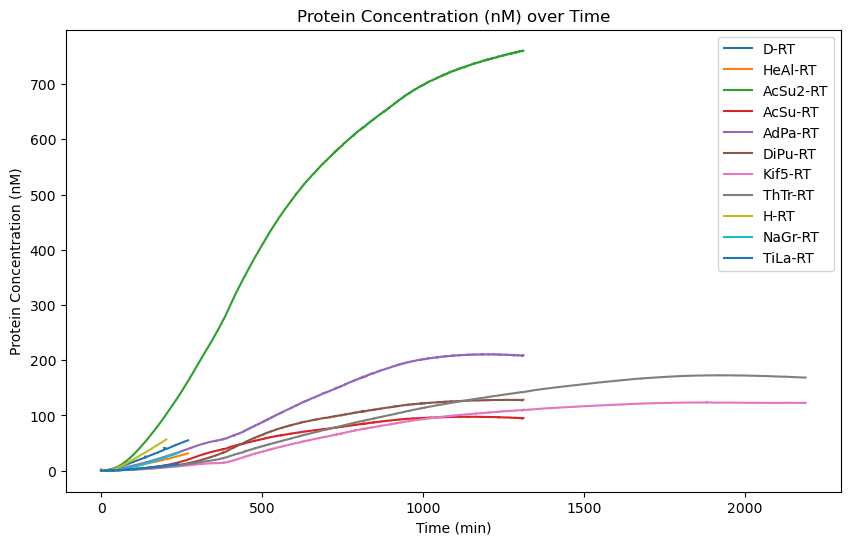

In [7]:
# Filter for non-null protein concentration data
df_filtered = df[df['Protein Concentration_nM'].notnull()]

# Create the plot
plt.figure(figsize=(10, 6))
for condition in df_filtered['condition'].unique():
    condition_data = df_filtered[df_filtered['condition'] == condition]
    plt.plot(condition_data['Time_min'], condition_data['Protein Concentration_nM'], label=condition)

plt.xlabel('Time (min)')
plt.ylabel('Protein Concentration (nM)')
plt.title('Protein Concentration (nM) over Time')
plt.legend()
plt.show()


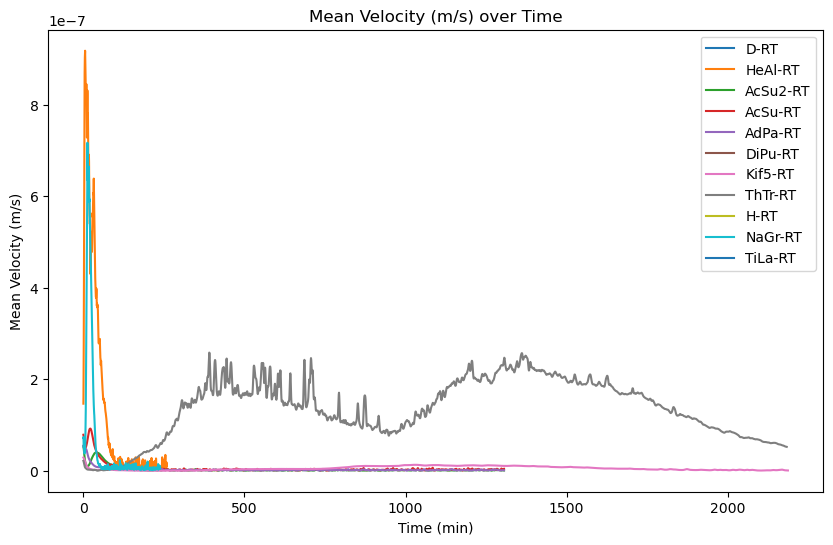

In [8]:
from scipy.ndimage import gaussian_filter1d

# Create the plot for mean velocity vs time
plt.figure(figsize=(10, 6))
for condition in df_filtered['condition'].unique():
    if condition == 'Kif5-RT':
        condition_data = df_filtered[df_filtered['condition'] == condition].dropna(subset=['velocity magnitude [m/s]_mean'])
    else:
        condition_data = df_filtered[df_filtered['condition'] == condition]
    smoothed_velocity = gaussian_filter1d(condition_data['velocity magnitude [m/s]_mean'], sigma=2)
    plt.plot(condition_data['Time_min'], smoothed_velocity, label=condition)

plt.xlabel('Time (min)')
plt.ylabel('Mean Velocity (m/s)')
plt.title('Mean Velocity (m/s) over Time')

# plt.xlim(0, 200)
# plt.yscale('log')

plt.legend()
plt.show()


In [9]:
df[df['condition'] == 'AdPa-RT']


,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Number of Protein Molecules,Rate of Change of Protein Molecules per Second,...,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h)
7556,AdPa-RT,Rep1,0,0.00,0.0000,0.816635,0.029793,0.659137,7.909645e+08,NaN,...,15.495276,-6.866008e-07,3.355336e-07,-97.526020,0.000340,0.000000,7.357091e-20,7.357091e-20,0.00,0.0000
7557,AdPa-RT,Rep1,45,0.75,0.0125,0.466450,0.017017,0.376490,4.517876e+08,NaN,...,19.728336,2.732572e-07,-1.693286e-06,-95.985943,0.000338,0.000002,5.099515e-20,1.245661e-19,0.75,0.0125
7558,AdPa-RT,Rep1,90,1.50,0.0250,0.376674,0.013742,0.304028,3.648330e+08,NaN,...,19.231086,-2.289509e-06,-9.527364e-07,-88.668472,0.000335,0.000004,3.691593e-20,1.614820e-19,1.50,0.0250
7559,AdPa-RT,Rep1,135,2.25,0.0375,0.352875,0.012874,0.284819,3.417824e+08,NaN,...,18.771895,-1.198492e-06,-2.568626e-07,-89.458937,0.000333,0.000006,3.433962e-20,1.958216e-19,2.25,0.0375
7560,AdPa-RT,Rep1,180,3.00,0.0500,0.492584,0.017971,0.397583,4.770997e+08,NaN,...,19.043444,-1.298901e-06,-9.242468e-07,-82.581570,0.000331,0.000008,3.355472e-20,2.293763e-19,3.00,0.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,AdPa-RT,Rep1,78570,1309.50,21.8250,258.339915,9.424917,208.515862,2.502190e+11,3.053181e+06,...,16.453160,-1.895593e-08,-8.119565e-08,-98.963954,0.000285,0.000206,1.955845e-22,1.394618e-18,1309.50,21.8250
9303,AdPa-RT,Rep1,78615,1310.25,21.8375,258.121989,9.416966,208.339966,2.500080e+11,3.898811e+06,...,17.992065,1.647262e-07,-3.386544e-07,-25.076382,0.000292,0.000206,1.671014e-25,1.394618e-18,1310.25,21.8375
9304,AdPa-RT,Rep1,78660,1311.00,21.8500,258.884361,9.444780,208.955305,2.507464e+11,4.221158e+06,...,16.442473,-1.054211e-07,-5.026790e-07,-109.201621,0.000299,0.000206,1.116598e-22,1.394730e-18,1311.00,21.8500
9305,AdPa-RT,Rep1,78705,1311.75,21.8625,258.290865,9.423128,208.476272,2.501715e+11,4.854103e+06,...,17.907141,5.848882e-09,-4.103660e-07,146.838429,0.000307,0.000206,4.638763e-22,1.395194e-18,1311.75,21.8625


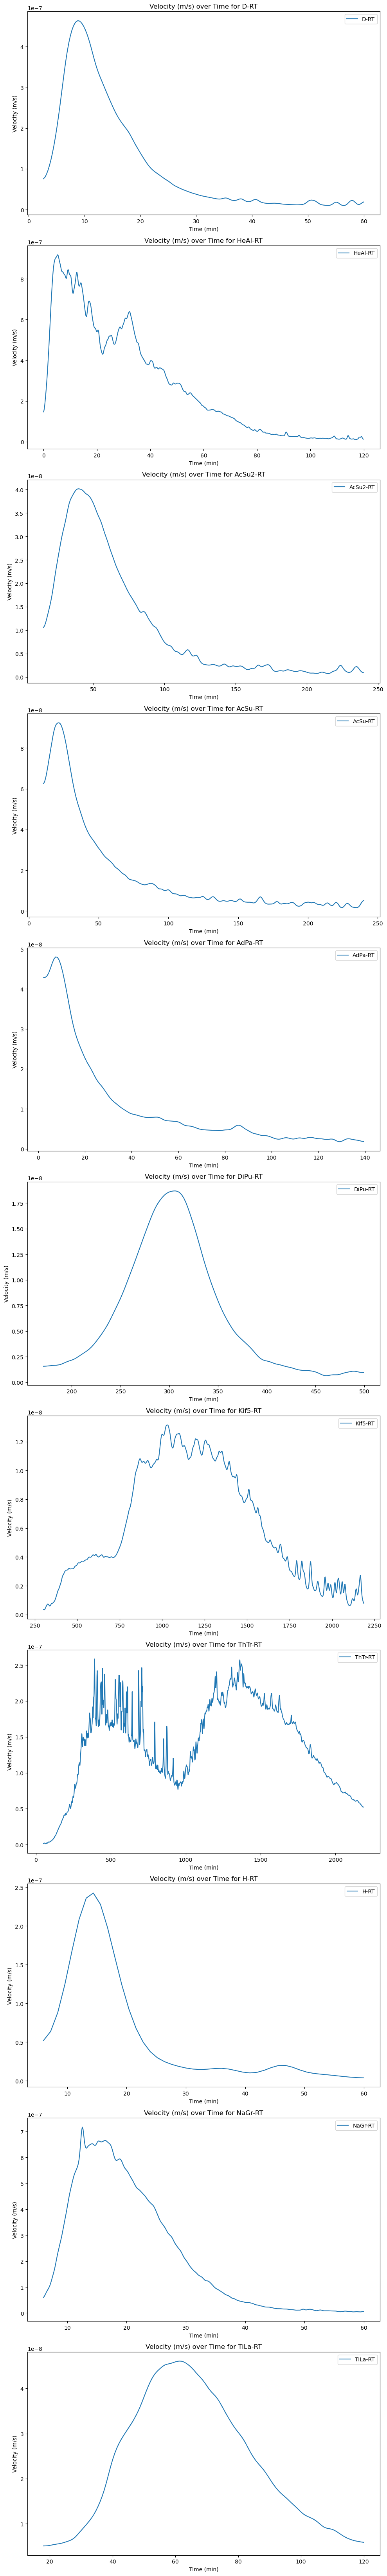

In [23]:
# Create subplots for velocity vs time for all conditions
conditions = df['condition'].unique()
num_conditions = len(conditions)
fig, axes = plt.subplots(num_conditions, 1, figsize=(10, 6 * num_conditions), sharex=False)

for ax, condition in zip(axes, conditions):
    if condition == 'D-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2.5) & (df['Time_min'] <= 60)]
    elif condition == 'NaGr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'H-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'HeAl-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 0) & (df['Time_min'] <= 120)]
    elif condition == 'TiLa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 18) & (df['Time_min'] <= 120)]
    elif condition == 'AcSu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 10) & (df['Time_min'] <= 240)]
    elif condition == 'AcSu2-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 15) & (df['Time_min'] <= 240)]
    elif condition == 'AdPa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2) & (df['Time_min'] <= 140)]
    elif condition == 'DiPu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 170) & (df['Time_min'] <= 500)]
    elif condition == 'Kif5-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 300)]
    elif condition == 'ThTr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 50)]
    else:
        condition_data = df[df['condition'] == condition]
    
    condition_data = condition_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    smoothed_velocity = gaussian_filter1d(condition_data['velocity magnitude [m/s]_mean'], sigma=2)
    ax.plot(condition_data['Time_min'], smoothed_velocity, label=condition)
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title(f'Velocity (m/s) over Time for {condition}')
    ax.legend()

plt.tight_layout()
plt.show()


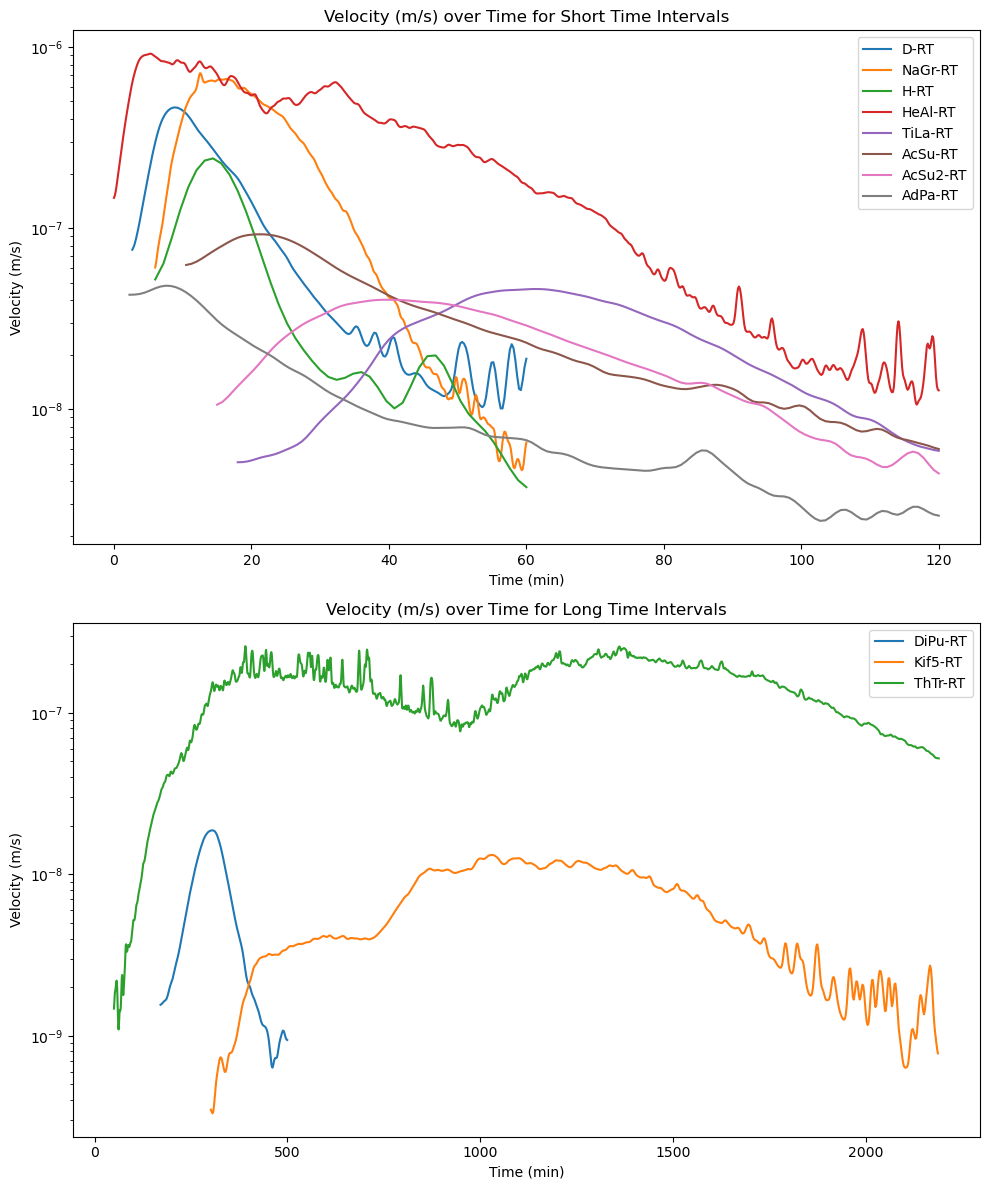

In [48]:
# Create two subplots for velocity vs time based on time interval
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=False)

# Define conditions for each subplot
short_time_conditions = ['D-RT', 'NaGr-RT', 'H-RT', 'HeAl-RT', 'TiLa-RT', 'AcSu-RT', 'AcSu2-RT', 'AdPa-RT']
long_time_conditions = ['DiPu-RT', 'Kif5-RT', 'ThTr-RT']

# Plot for conditions with time interval <= 300 min
for condition in short_time_conditions:
    if condition == 'D-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2.5) & (df['Time_min'] <= 60)]
    elif condition == 'NaGr-RT' or condition == 'H-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'HeAl-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 0) & (df['Time_min'] <= 120)]
    elif condition == 'TiLa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 18) & (df['Time_min'] <= 120)]
    elif condition == 'AcSu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 10) & (df['Time_min'] <= 120)]
    elif condition == 'AcSu2-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 15) & (df['Time_min'] <= 120)]
    elif condition == 'AdPa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2) & (df['Time_min'] <= 120)]
    else:
        condition_data = df[df['condition'] == condition]
    
    if condition not in ['NaGr-RT', 'AdPa-RT']:
        condition_data = condition_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    smoothed_velocity = gaussian_filter1d(condition_data['velocity magnitude [m/s]_mean'], sigma=2)
    axes[0].plot(condition_data['Time_min'], smoothed_velocity, label=condition)

axes[0].set_xlabel('Time (min)')
axes[0].set_ylabel('Velocity (m/s)')
axes[0].set_title('Velocity (m/s) over Time for Short Time Intervals')
axes[0].set_yscale('log')
axes[0].legend()

# Plot for conditions with time interval > 300 min
for condition in long_time_conditions:
    if condition == 'DiPu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 170) & (df['Time_min'] <= 500)]
    elif condition == 'Kif5-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 300)]
    elif condition == 'ThTr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 50)]
    else:
        condition_data = df[df['condition'] == condition]
    
    condition_data = condition_data.dropna(subset=['velocity magnitude [m/s]_mean'])
    
    smoothed_velocity = gaussian_filter1d(condition_data['velocity magnitude [m/s]_mean'], sigma=2)
    axes[1].plot(condition_data['Time_min'], smoothed_velocity, label=condition)

axes[1].set_xlabel('Time (min)')
axes[1].set_ylabel('Velocity (m/s)')
axes[1].set_title('Velocity (m/s) over Time for Long Time Intervals')
axes[1].legend()
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


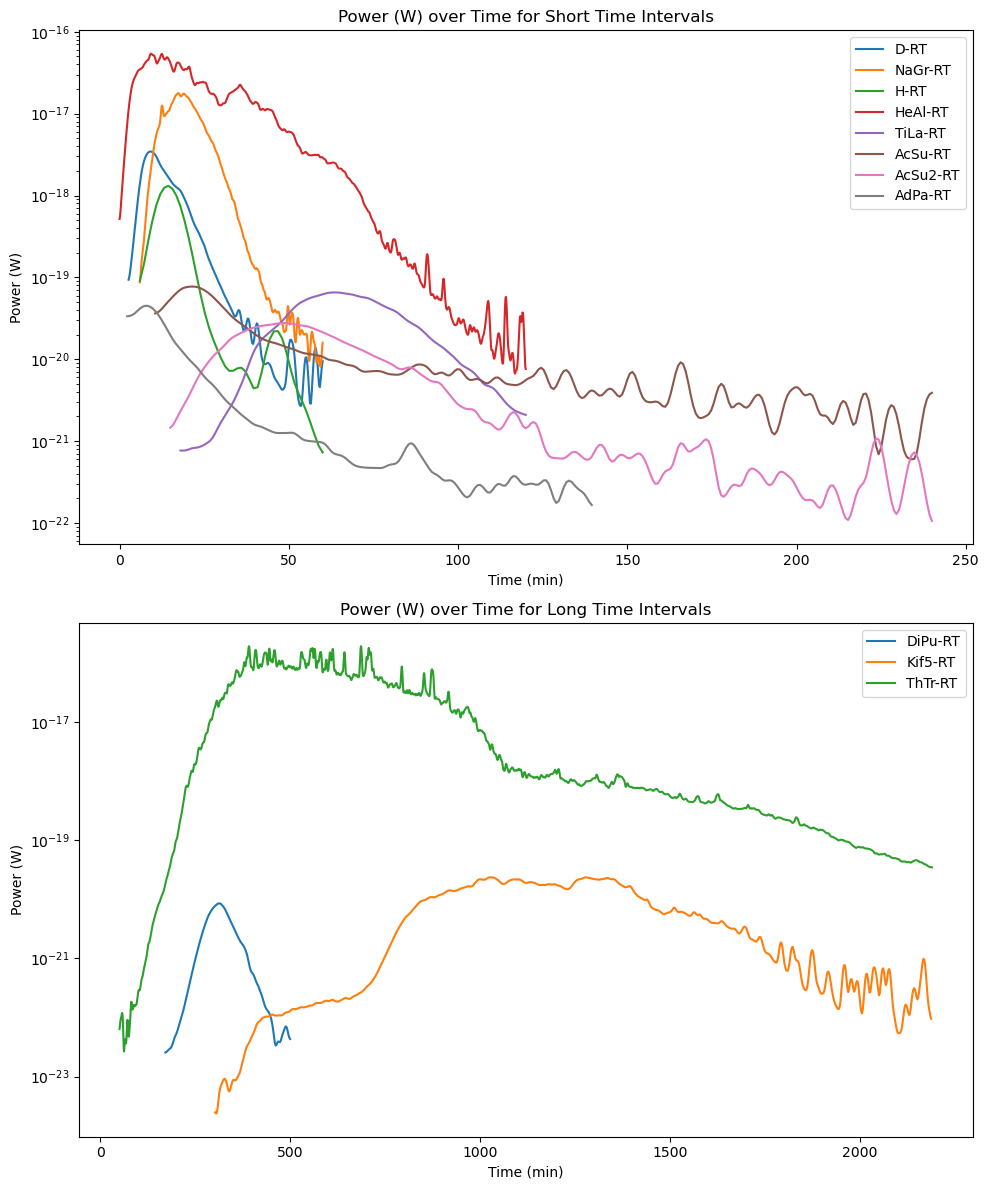

In [27]:
# Create two subplots for power vs time based on time interval
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=False)

# Define conditions for each subplot
short_time_conditions = ['D-RT', 'NaGr-RT', 'H-RT', 'HeAl-RT', 'TiLa-RT', 'AcSu-RT', 'AcSu2-RT', 'AdPa-RT']
long_time_conditions = ['DiPu-RT', 'Kif5-RT', 'ThTr-RT']

# Plot for conditions with time interval <= 300 min
for condition in short_time_conditions:
    if condition == 'D-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2.5) & (df['Time_min'] <= 60)]
    elif condition == 'NaGr-RT' or condition == 'H-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'HeAl-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 0) & (df['Time_min'] <= 120)]
    elif condition == 'TiLa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 18) & (df['Time_min'] <= 120)]
    elif condition == 'AcSu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 10) & (df['Time_min'] <= 240)]
    elif condition == 'AcSu2-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 15) & (df['Time_min'] <= 240)]
    elif condition == 'AdPa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2) & (df['Time_min'] <= 140)]
    else:
        condition_data = df[df['condition'] == condition]
    
    if condition not in ['NaGr-RT', 'AdPa-RT']:
        condition_data = condition_data.dropna(subset=['power [W]_mean'])
    
    smoothed_power = gaussian_filter1d(condition_data['power [W]_mean'], sigma=2)
    axes[0].plot(condition_data['Time_min'], smoothed_power, label=condition)

axes[0].set_xlabel('Time (min)')
axes[0].set_ylabel('Power (W)')
axes[0].set_title('Power (W) over Time for Short Time Intervals')
axes[0].set_yscale('log')
axes[0].legend()

# Plot for conditions with time interval > 300 min
for condition in long_time_conditions:
    if condition == 'DiPu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 170) & (df['Time_min'] <= 500)]
    elif condition == 'Kif5-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 300)]
    elif condition == 'ThTr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 50)]
    else:
        condition_data = df[df['condition'] == condition]
    
    condition_data = condition_data.dropna(subset=['power [W]_mean'])
    
    smoothed_power = gaussian_filter1d(condition_data['power [W]_mean'], sigma=2)
    axes[1].plot(condition_data['Time_min'], smoothed_power, label=condition)

axes[1].set_xlabel('Time (min)')
axes[1].set_ylabel('Power (W)')
axes[1].set_title('Power (W) over Time for Long Time Intervals')
axes[1].legend()
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


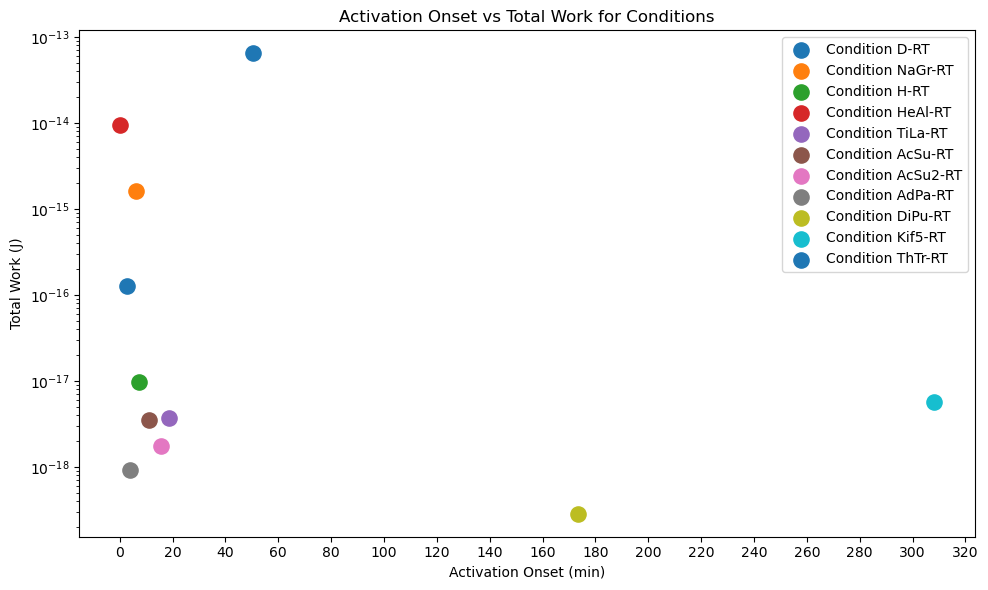

In [40]:
# Prepare a dictionary to store the activation onset and total work for each condition
activation_onset_data = {}

# Function to determine activation onset based on power
def find_activation_onset(condition_data):
    # Calculate the difference in power to find the slope
    power_diff = np.diff(condition_data['power [W]_mean'])
    # Find the index where the slope first becomes positive
    onset_index = np.where(power_diff > 0)[0]
    if len(onset_index) > 0:
        return condition_data.iloc[onset_index[0]]['Time_min']
    else:
        return None

# Analyze conditions with short time intervals
short_time_conditions = ['D-RT', 'NaGr-RT', 'H-RT', 'HeAl-RT', 'TiLa-RT', 'AcSu-RT', 'AcSu2-RT', 'AdPa-RT']
for condition in short_time_conditions:
    if condition == 'D-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2.5) & (df['Time_min'] <= 60)]
    elif condition == 'NaGr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'H-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 6) & (df['Time_min'] <= 60)]
    elif condition == 'HeAl-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 0) & (df['Time_min'] <= 120)]
    elif condition == 'TiLa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 18) & (df['Time_min'] <= 120)]
    elif condition == 'AcSu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 10) & (df['Time_min'] <= 240)]
    elif condition == 'AcSu2-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 15) & (df['Time_min'] <= 240)]
    elif condition == 'AdPa-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 2) & (df['Time_min'] <= 140)]
    else:
        condition_data = df[df['condition'] == condition]
    
    if condition not in ['NaGr-RT', 'AdPa-RT']:
        condition_data = condition_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter to smooth the power data
    smoothed_power = gaussian_filter1d(condition_data['power [W]_mean'], sigma=2)
    condition_data['smoothed_power'] = smoothed_power
    
    # Find the activation onset
    activation_onset = find_activation_onset(condition_data)
    
    # Calculate total work as the sum of smoothed power
    total_work = condition_data['smoothed_power'].sum()
    
    # Store the results
    if activation_onset is not None:
        activation_onset_data[condition] = (activation_onset, total_work)

# Analyze conditions with long time intervals
long_time_conditions = ['DiPu-RT', 'Kif5-RT', 'ThTr-RT']
for condition in long_time_conditions:
    if condition == 'DiPu-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 170) & (df['Time_min'] <= 500)]
    elif condition == 'Kif5-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 300)]
    elif condition == 'ThTr-RT':
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= 50)]
    else:
        condition_data = df[df['condition'] == condition]
    
    condition_data = condition_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter to smooth the power data
    smoothed_power = gaussian_filter1d(condition_data['power [W]_mean'], sigma=2)
    condition_data['smoothed_power'] = smoothed_power
    
    # Find the activation onset
    activation_onset = find_activation_onset(condition_data)
    
    # Calculate total work as the sum of smoothed power
    total_work = condition_data['smoothed_power'].sum()
    
    # Store the results
    if activation_onset is not None:
        activation_onset_data[condition] = (activation_onset, total_work)

# Plot the activation onset vs total work for each condition
plt.figure(figsize=(10, 6))
for condition, (onset, work) in activation_onset_data.items():
    plt.scatter(onset, work, label=f'Condition {condition}', s=120)

plt.xlabel('Activation Onset (min)')
plt.ylabel('Total Work (J)')
plt.title('Activation Onset vs Total Work for Conditions')
plt.yscale('log')
plt.xticks(np.arange(0, max(onset for onset, _ in activation_onset_data.values()) + 20, 20))
plt.legend()
plt.tight_layout()
plt.show()


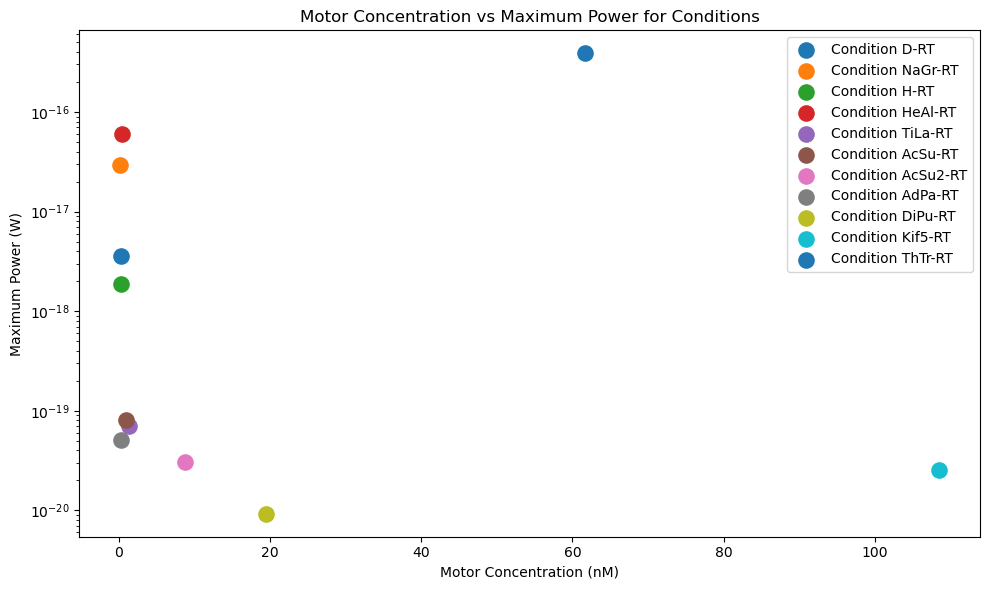

In [43]:
# Find the motor concentration for the maximum power within specified time intervals for each condition
max_power_concentration_data = {}

# Define time intervals for each condition
time_intervals = {
    'D-RT': (2.5, 60),
    'NaGr-RT': (6, 60),
    'H-RT': (6, 60),
    'HeAl-RT': (0, 120),
    'TiLa-RT': (18, 120),
    'AcSu-RT': (10, 240),
    'AcSu2-RT': (15, 240),
    'AdPa-RT': (2, 140),
    'DiPu-RT': (170, 500),
    'Kif5-RT': (300, None),
    'ThTr-RT': (50, None)
}

for condition in short_time_conditions + long_time_conditions:
    if condition in time_intervals:
        start_time, end_time = time_intervals[condition]
        if end_time is not None:
            condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= start_time) & (df['Time_min'] <= end_time)]
        else:
            condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= start_time)]
        
        if not condition_data.empty:
            max_power_index = condition_data['power [W]_mean'].idxmax()
            max_power_concentration = condition_data.loc[max_power_index, 'Protein Concentration_nM']
            max_power_value = condition_data.loc[max_power_index, 'power [W]_mean']
            max_power_concentration_data[condition] = (max_power_concentration, max_power_value)

# Plot the motor concentration vs maximum power for each condition
plt.figure(figsize=(10, 6))
for condition, (concentration, power) in max_power_concentration_data.items():
    plt.scatter(concentration, power, label=f'Condition {condition}', s=120)

plt.xlabel('Motor Concentration (nM)')
plt.ylabel('Maximum Power (W)')
plt.title('Motor Concentration vs Maximum Power for Conditions')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


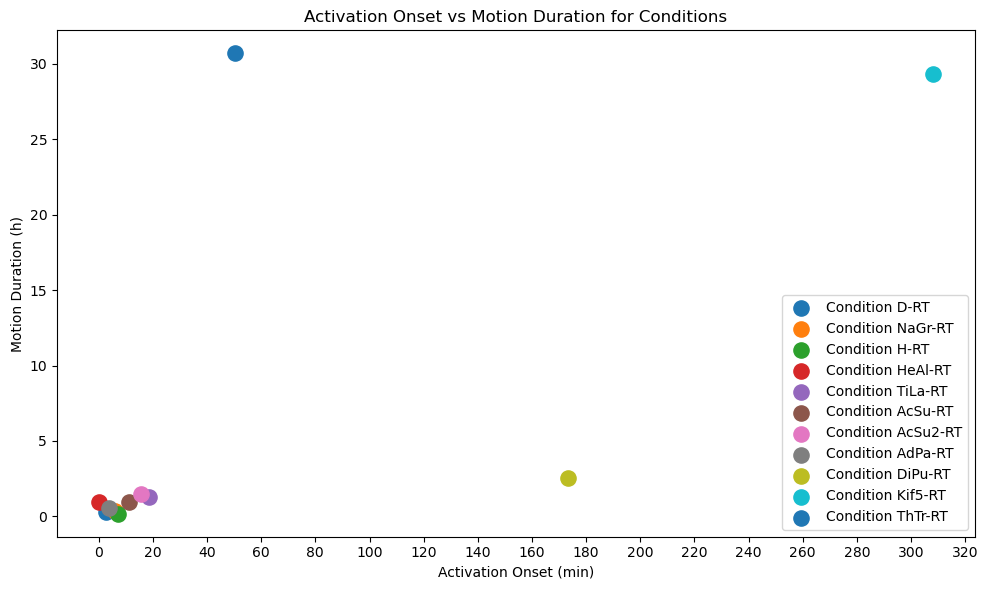

In [49]:
# Prepare a dictionary to store the activation onset and motion duration for each condition
activation_motion_data = {}

# Function to determine activation onset based on power
def find_activation_onset(condition_data):
    # Calculate the difference in power to find the slope
    power_diff = np.diff(condition_data['power [W]_mean'])
    # Find the index where the slope first becomes positive
    onset_index = np.where(power_diff > 0)[0]
    if len(onset_index) > 0:
        return condition_data.iloc[onset_index[0]]['Time_min']
    else:
        return None

# Function to calculate motion duration
def calculate_motion_duration(protein_data):
    max_velocity = protein_data['velocity magnitude [m/s]_mean'].max()
    threshold_velocity = 0.2 * max_velocity
    above_threshold = protein_data[protein_data['velocity magnitude [m/s]_mean'] >= threshold_velocity]
    if not above_threshold.empty:
        return above_threshold['Time_h'].max() - above_threshold['Time_h'].min()
    else:
        return None

# Analyze conditions with short and long time intervals
all_conditions = {
    'D-RT': (2.5, 60),
    'NaGr-RT': (6, 60),
    'H-RT': (6, 60),
    'HeAl-RT': (0, 120),
    'TiLa-RT': (18, 120),
    'AcSu-RT': (10, 240),
    'AcSu2-RT': (15, 240),
    'AdPa-RT': (2, 140),
    'DiPu-RT': (170, 500),
    'Kif5-RT': (300, None),
    'ThTr-RT': (50, None)
}

for condition, (start_time, end_time) in all_conditions.items():
    if end_time is not None:
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= start_time) & (df['Time_min'] <= end_time)]
    else:
        condition_data = df[(df['condition'] == condition) & (df['Time_min'] >= start_time)]
    
    condition_data = condition_data.dropna(subset=['power [W]_mean'])
    
    # Apply Gaussian filter to smooth the power data
    smoothed_power = gaussian_filter1d(condition_data['power [W]_mean'], sigma=2)
    condition_data['smoothed_power'] = smoothed_power
    
    # Find the activation onset
    activation_onset = find_activation_onset(condition_data)
    
    # Calculate motion duration using the provided function
    motion_duration = calculate_motion_duration(condition_data)
    
    # Store the results
    if activation_onset is not None and motion_duration is not None:
        activation_motion_data[condition] = (activation_onset, motion_duration)

# Plot the activation onset vs motion duration for each condition
plt.figure(figsize=(10, 6))
for condition, (onset, duration) in activation_motion_data.items():
    plt.scatter(onset, duration, label=f'Condition {condition}', s=120)

plt.xlabel('Activation Onset (min)')
plt.ylabel('Motion Duration (h)')
plt.title('Activation Onset vs Motion Duration for Conditions')
# plt.yscale('log')
plt.xticks(np.arange(0, max(onset for onset, _ in activation_motion_data.values()) + 20, 20))
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Prepare the data for PCA
pca_data = []
conditions = []
for condition in all_conditions.keys():
    condition_data = df[df['condition'] == condition]
    
    condition_data = condition_data.dropna(subset=['power [W]_mean', 'correlation length [m]_mean', 'velocity magnitude [m/s]_mean'])
    
    # Calculate required metrics
    activation_onset = activation_motion_data[condition][0]
    motion_duration = activation_motion_data[condition][1]
    total_work = condition_data['power [W]_mean'].sum()
    max_power = condition_data['power [W]_mean'].max()
    
    # Find the correlation length at the time of maximal velocity
    max_velocity_index = condition_data['velocity magnitude [m/s]_mean'].idxmax()
    correlation_length_at_max_velocity = condition_data.loc[max_velocity_index, 'correlation length [m]_mean']
    
    pca_data.append([activation_onset, total_work, motion_duration, max_power, correlation_length_at_max_velocity])
    conditions.append(condition.replace('-RT', ''))

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['condition'] = conditions

# Plot the PCA results using Plotly for interactive tooltips
fig = px.scatter(pca_df, x='PC1', y='PC2', text='condition', color='condition', 
                 title='PCA of Activation Onset, Total Work, Motion Duration, Max Power, and Correlation Length at Max Velocity')
fig.update_traces(marker=dict(size=12), textposition='top center', selector=dict(mode='markers+text'))
fig.update_layout(showlegend=True, width=1200, height=800)  # Make the plot bigger
fig.show()
